В домашньому завданні до даного модулю ви потренуєтесь робити тестове завдання для влаштування на роботу. За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах. Знайти датасет ви можете за посиланням.

Використайте алгоритми SVM та випадковий ліс з бібліотеки scikit-learn. Як характеристики можете брати показники з акселерометра, проте щоб покращити результати роботи алгоритмів, спочатку можна підготувати наш датасет і розрахувати часові ознаки (time domain features). Більше ці характеристики описані в даній статті.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [16]:
all_data = {'all_idle.csv':'idle', 'all_running.csv':'running', 'all_stairs.csv':'stairs', 'all_walking.csv':'walking'}
for i in all_data:
    df = pd.DataFrame(pd.read_csv(i))
    df['activity'] = all_data[i]
    df.to_csv(i, index=False)
    

In [6]:
df = pd.read_csv('all_data.csv')
df.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,0.392649,-0.071826,9.768343,idle
1,0.387861,-0.062249,9.753978,idle
2,0.440533,0.033519,9.734824,idle
3,0.421380,-0.052672,9.749189,idle
4,0.426168,-0.019154,9.734824,idle


In [7]:
# Розділяємо дані на features (ознаки) та labels (мітки)
features = df.drop('activity', axis=1)  # Всі колонки крім 'activity'
labels = df['activity']

# Розділимо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=7)

# Нормалізуємо дані
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Модель випадкового лісу
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Оцінка результатів за допомогою classification_report
svm_report = classification_report(y_test, svm_pred, zero_division=1)
rf_report = classification_report(y_test, rf_pred, zero_division=1)

print("Classification Report for SVM:\n", svm_report)
print("\nClassification Report for Random Forest:\n", rf_report)


Classification Report for SVM:
               precision    recall  f1-score   support

        idle       0.80      0.78      0.79      6280
     running       0.85      0.85      0.85     20352
      stairs       1.00      0.00      0.00       989
     walking       0.77      0.85      0.81     11151

    accuracy                           0.82     38772
   macro avg       0.85      0.62      0.61     38772
weighted avg       0.82      0.82      0.81     38772


Classification Report for Random Forest:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6280
     running       1.00      1.00      1.00     20352
      stairs       1.00      1.00      1.00       989
     walking       1.00      1.00      1.00     11151

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



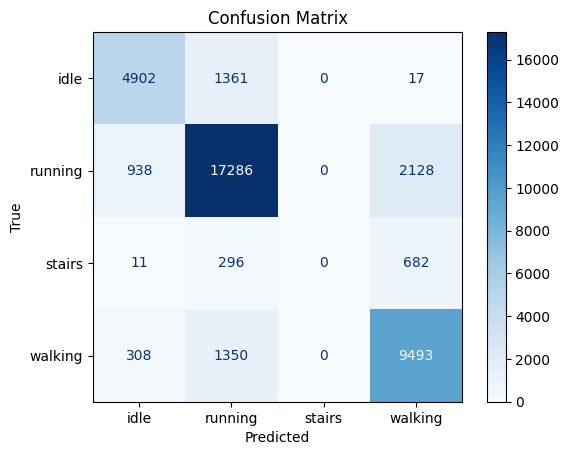

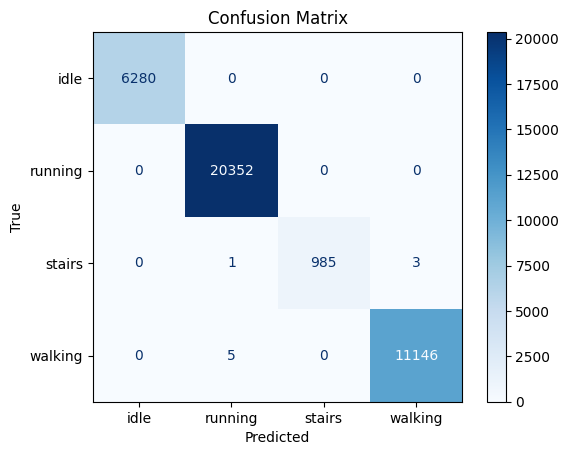

In [10]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Викликаємо функцію для SVM
plot_confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)

# Викликаємо функцію для Random Forest
plot_confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)